In [1]:
%matplotlib qt

In [2]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

2024-05-22 17:17:07.835 Python[24424:1003783] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_24424/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [3]:
wkdir = [
    '/Users/yao/Desktop/Data/DPM_Al1.5um_diag_t18/',
    # '/Users/yao/Desktop/Data/DPM_Si200nm_Al50nm_t13/DPM_Si200nm_Al50nm_t13_r1/', # 70% laser energy
    '/Users/yao/Desktop/Data/DPM_Si200nm_Al50nm_t10_r1/',  # 50%
    '/Users/yao/Desktop/Data/DPM_Si200nm_Al50nm_t10_r0/',
    ]

In [4]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)
S2 = happi.Open(wkdir[2], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)

Loaded simulation '/Users/yao/Desktop/Data/DPM_Al1.5um_diag_t18/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Desktop/Data/DPM_Si200nm_Al50nm_t10_r1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
Loaded simulation '/Users/yao/Desktop/Data/DPM_Si200nm_Al50nm_t10_r0/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Sca

In [5]:
# prepare constants, units

me = 9.1e-31
mp = 1836.*me
qe = 1.6e-19
ep = 8.9e-12  # epsilon_0
c  = 3.0e8
wr = 2.*np.pi*3e8/1.058e-6
de = c / wr
# Lx = S0.namelist.L_x.real * de * 1e3      # in mm
# dx = S0.namelist.d_x * de * 1e3           # in mm

Te = S0.namelist.temp_e * 511.e3             # in eV
ne = S0.namelist.n0 * 1.1e21                 # in cm-3
ld = 7.43e2 * Te**0.5 * ne**(-0.5) * 10. # in mm
# dt = S0.namelist.d_t

# B0 = S0.namelist.B_z * (me * wr / qe)
# wc = qe * B0 / me


In [6]:
print('Debye length ld = {:.0e} nm'.format(ld*1e6))

Debye length ld = 9e-02 nm


In [7]:
# plt.rc('font', family='sans-serif', serif='Arial')
# plt.rc('text', usetex=False)
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# plt.rc('axes', labelsize=12)
# plt.rc('legend', fontsize=12)

# plt.rc('font', family='sans-serif', serif='Arial')

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
plt.rc('legend', fontsize=9)

width  = 3.487
height = width / 1.618 * 1.0

In [8]:
## w/o DPM - 1.5 um Al
#shot 193
exp_energy_193  = np.array([4.71,    7.76,   10.01,  12.64,  14.78,  16.70,  18.97,  20.89,  22.55,  24.00,  25.25]) 
exp_number_193  = np.array([6.79e9, 4.92e9, 2.51e9, 1.39e9, 4.73e8, 3.53e8, 9.26e7, 5.53e7, 4.00e7, 2.91e7, 2.15e7]) 

#shot 194
exp_energy_194  = np.array([4.83,    7.90,   10.16,  12.79,  14.92,  16.82,  19.07,  20.95,  22.58,  24.01,  25.25]) 
exp_number_194  = np.array([5.78e9, 4.54e9, 1.63e9, 9.77e8, 6.50e8, 4.35e8, 2.09e8, 7.92e7, 5.43e7, 4.37e7, 3.35e7]) 

In [9]:
exp_energy_nodpm = np.mean(np.stack((exp_energy_193, exp_energy_194)), axis=0)
exp_energy_nodpm_xerr_min = np.stack((exp_energy_193, exp_energy_194)).min(axis=0)
exp_energy_nodpm_xerr_max = np.stack((exp_energy_193, exp_energy_194)).max(axis=0)
exp_energy_nodpm_xerr = np.stack((np.abs(exp_energy_nodpm_xerr_min - exp_energy_nodpm), 
                                  np.abs(exp_energy_nodpm_xerr_max - exp_energy_nodpm))
                                ).min(axis=0)

exp_number_nodpm = np.mean(np.stack((exp_number_193, exp_number_194)), axis=0)
exp_number_nodpm_yerr_min = np.stack((exp_number_193, exp_number_194)).min(axis=0)
exp_number_nodpm_yerr_max = np.stack((exp_number_193, exp_number_194)).max(axis=0)
exp_number_nodpm_yerr = np.stack((np.abs(exp_number_nodpm_yerr_min - exp_number_nodpm), 
                                  np.abs(exp_number_nodpm_yerr_max - exp_number_nodpm))
                                ).min(axis=0)

In [10]:
## with DPM - 200 nm Si + 50 nm Al
# #shot 115
# exp_energy_115 = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number_115 = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 56
exp_energy_56  = np.array([4.9,         8.0,    10.3,    13.0,    15.1,    17.1,    19.5,    21.5,    23.4,    25.0,    26.5,    28.1,    29.5,   30.9,   33.67,   35.17]) 
exp_number_56  = np.array([2.71e9,   2.29e9,  1.30e9,  8.10e8,  6.20e8,  2.78e8,  2.53e8,  1.10e8,  7.93e7,  5.87e7,  3.91e7,  1.96e7,  1.25e7, 1.01e7, 5.565e6, 5.165e6]) 

#shot 111
exp_energy_111 = np.array([4.49,       7.74,   10.01,   12.67,   14.87,   16.88,   19.33,   21.47,   23.42,   25.23,   26.90,   28.75,   30.37,   32.03,   33.67,   35.17])
exp_number_111 = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])

#shot 112
exp_energy_112 = np.array([4.76,       7.83,   10.10,   12.76,   14.95,   16.94,   19.34,   21.41,   23.26,   24.95,   26.48,   28.14,   29.57,   30.95,   33.67,   35.17])
exp_number_112 = np.array([3.252e9, 2.844e9, 1.888e9, 1.286e9, 8.366e8, 3.199e8, 2.005e8, 1.081e8, 6.068e7, 3.840e7, 3.108e7, 1.871e7, 1.021e7, 1.428e7, 5.565e6, 5.165e6])

# #shot 216
# exp_energy_216  = np.array([4.54,      7.53,    9.73,   12.27,    14.3,   16.05,   17.99,   19.48,]) 
# exp_number_216  = np.array([2.25e9,  1.36e9,  7.65e8,  2.76e8,  1.01e8,  5.01e7,  1.74e7,  1.20e7,]) 

In [11]:
exp_energy_dpm_data     = np.stack((exp_energy_56, exp_energy_111, exp_energy_112))
exp_energy_dpm          = np.mean(exp_energy_dpm_data, axis=0)
exp_energy_dpm_xerr_min = exp_energy_dpm_data.min(axis=0)
exp_energy_dpm_xerr_max = exp_energy_dpm_data.max(axis=0)
exp_energy_dpm_xerr     = np.stack((np.abs(exp_energy_dpm_xerr_min - exp_energy_dpm), 
                                    np.abs(exp_energy_dpm_xerr_max - exp_energy_dpm))
                                  ).min(axis=0)

exp_number_dpm_data     = np.stack((exp_number_56, exp_number_111, exp_number_112))
exp_number_dpm          = np.mean(exp_number_dpm_data, axis=0)
exp_number_dpm_yerr_min = exp_number_dpm_data.min(axis=0)
exp_number_dpm_yerr_max = exp_number_dpm_data.max(axis=0)
exp_number_dpm_yerr     = np.stack((np.abs(exp_number_dpm_yerr_min - exp_number_dpm), 
                                    np.abs(exp_number_dpm_yerr_max - exp_number_dpm))
                                  ).min(axis=0)

In [12]:
## prepare the simulation data

yrange_ndpm = [0*S0.namelist.l0, 40*S0.namelist.l0]   # 22.76
fitting_factor_ndpm = 5e10 * 70 #5e10 * 50
ene_ndpm = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange_ndpm},).getData()

yrange_wdpm = [0*S1.namelist.l0, 40*S1.namelist.l0]   # 22.76
fitting_factor_wdpm = 5e11 * 4.5
ene_wdpm = S1.Screen(2, units=['um','fs','MeV'],sum={'y':yrange_wdpm},).getData()

xx  = S0.Screen(2, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(2, units=['um','fs','MeV']).getTimes()

In [89]:
np.savetxt('/Users/yao/Desktop/energy.txt',xx)

In [90]:
np.savetxt('/Users/yao/Desktop/dNdE_woDPM.txt',ene_ndpm[-1]*fitting_factor_ndpm)

In [91]:
np.savetxt('/Users/yao/Desktop/dNdE_withDPM.txt',ene_wdpm[-1]*fitting_factor_wdpm)

In [13]:
width  = 3.487 * 1.3
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

# experiment
ax.errorbar(exp_energy_nodpm, exp_number_nodpm, 
            yerr=exp_number_nodpm_yerr, 
            xerr=exp_energy_nodpm_xerr,
            fmt='.b',markersize=4,
            mfc='none',
            ecolor='b',elinewidth=1.0,
            capsize=2.0, capthick = 1.0,
            label='Exp. no DPM'
           )
ax.set_yscale('log')

# fitting
xf = np.linspace(0,25, 100)
yf = 7.104e10 * np.exp(-3.302e-1 * xf)
ax.plot(xf, yf, linewidth=1, linestyle='-.', color='m', label='Fit    no DPM')

# simulation
ax.semilogy(xx,ene_ndpm[-1]*fitting_factor_ndpm, color='b',lw=1.0,
             linestyle='-',
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label='Sim. no DPM',
           )



# x = (exp_energy_193 + exp_energy_194) / 2.
# y1 = np.asarray([exp_number_193, exp_number_194]).min(0)
# y2 = np.asarray([exp_number_193, exp_number_194]).max(0)
# ax.fill_between(x, y1, y2, alpha=0.3, color='blue', lw=0)
# ax.plot(x, (y1 + y2)/2, linewidth=0, marker='s', markersize=4, color='blue', label='Exp. no DPM')


ax.errorbar(exp_energy_dpm, exp_number_dpm, 
            yerr=exp_number_dpm_yerr, 
            xerr=exp_energy_dpm_xerr,
            fmt='.r',markersize=4,
            mfc='none',mew=1.0,
            ecolor='r',elinewidth=1.0,
            capsize=2.0, capthick = 1.0,
            label='Exp. w/ DPM'
           )

# fitting
xf = np.linspace(0,36, 100)
yf = 3.369e10 * np.exp(-2.482e-1 * xf)
ax.plot(xf, yf, linewidth=1, linestyle=':', color='k', label='Fit    w/ DPM')


# simulation
ax.semilogy(xx,ene_wdpm[-1]*fitting_factor_wdpm, color='r',lw=1.0,
             linestyle='--',
            label='Sim. w/ DPM',
           )

# experiment
# x = (exp_energy_56 + exp_energy_111[:-2] + exp_energy_112) / 3.
# y1 = np.asarray([exp_number_56, exp_number_111[:-2], exp_number_112]).min(0)
# y2 = np.asarray([exp_number_56, exp_number_111[:-2], exp_number_112]).max(0)
# ax.fill_between(x, y1, y2, alpha=0.3, color='red', lw=0)
# ax.plot(x, (y1 + y2)/2, linewidth=0, marker='^', markersize=4, color='red', label='Exp. w/ DPM')






ax.set_xlim([0,40])
ax.set_ylim([1e6,1e11])
# ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [58]:
fig.savefig('/Users/yao/Desktop/energy_spec.pdf',dpi=600)

In [14]:
width  = 3.487 * 1.2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

# simulation
ax.semilogy(xx,ene_ndpm[-1]*fitting_factor_ndpm, color='b',lw=1.0,
             linestyle='-',
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'Sim. no DPM',
           )

# # experiment
# x = (exp_energy_193 + exp_energy_194) / 2.
# y1 = np.asarray([exp_number_193, exp_number_194]).min(0)
# y2 = np.asarray([exp_number_193, exp_number_194]).max(0)
# ax.fill_between(x, y1, y2, alpha=0.3, color='blue', lw=0)
# ax.plot(x, (y1 + y2)/2, linewidth=0, marker='s', markersize=4, color='blue', label='Exp. no DPM')

# fitting
xf = np.linspace(0,25, 100)
yf = 7.104e10 * np.exp(-3.302e-1 * xf)
ax.plot(xf, yf, linewidth=1, linestyle='--', color='blue', label='Fit. no DPM')


# simulation
ax.semilogy(xx,ene_wdpm[-1]*fitting_factor_wdpm, color='r',lw=1.0,
             linestyle='-',
            label=r'Sim. w/ DPM',
           )

# # experiment
# x = (exp_energy_56 + exp_energy_111[:-2] + exp_energy_112) / 3.
# y1 = np.asarray([exp_number_56, exp_number_111[:-2], exp_number_112]).min(0)
# y2 = np.asarray([exp_number_56, exp_number_111[:-2], exp_number_112]).max(0)
# ax.fill_between(x, y1, y2, alpha=0.3, color='red', lw=0)
# ax.plot(x, (y1 + y2)/2, linewidth=0, marker='^', markersize=4, color='red', label='Exp. w/ DPM')

# fitting
xf = np.linspace(0,35, 100)
yf = 3.369e10 * np.exp(-2.482e-1 * xf)
ax.plot(xf, yf, linewidth=1, linestyle='--', color='red', label='Fit w. DPM')


ax.scatter(exp_energy_56, exp_number_56, color='green', marker='s',
            s=24,
            label='#56 w. DPM')
ax.scatter(exp_energy_111, exp_number_111, color='red', marker='o',
            s=24,
            label='#111 w. DPM')
ax.scatter(exp_energy_112, exp_number_112, color='blue', marker='*',
            s=24,
            label='#112 w. DPM')

ax.scatter(exp_energy_193, exp_number_193, color='c', marker='^',
            s=24,
            label='#193 no DPM')

ax.scatter(exp_energy_194, exp_number_194, color='m', marker='d',
            s=24,
            label='#194 no DPM')

ax.set_xlim([0,35])
ax.set_ylim([1e6,1e11])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dN/dE')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [18]:
fig.savefig('/Users/yao/Desktop/fig2_spec2.pdf')

In [60]:
# simulation data

ene_ndpm = np.array(S0.Screen(2, units=['um','fs','MeV']).getData()[-1]) # last timestep
ene_wdpm = np.array(S1.Screen(2, units=['um','fs','MeV']).getData()[-1]) # last timestep

yy = np.array(S1.Screen(2, units=['um','fs','MeV']).getAxis('y'))
ee = np.array(S1.Screen(2, units=['um','fs','MeV']).getAxis('ekin'))

In [61]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 1.2
height = width / 1.618 * 0.8

fig = plt.figure(figsize=(width, height))

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow(np.log10(ene_ndpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ee[0],ee[-1],yy[0],yy[-1]],
           vmin=-4,
           vmax=-1,
           aspect='equal',
          )

im1 = grid[1].imshow(np.log10(ene_wdpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ee[0],ee[-1],yy[0],yy[-1]],
           vmin=-4,
           vmax=-1,
           aspect='equal',
          )

grid[0].set_xlim(0,35)
grid[1].set_xlim(0,35)
grid[1].set_ylim(5,35)
grid[0].set_xlabel('Energy (MeV)')
grid[1].set_xlabel('Energy (MeV)')
grid[0].set_ylabel('y (um)')
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
# fig.tight_layout()
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_95146/3911377494.py:23: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow(np.log10(ene_ndpm.T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_95146/3911377494.py:32: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[1].imshow(np.log10(ene_wdpm.T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_95146/3911377494.py:54: MatplotlibDeprecationWarning: The toggle_label function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use ax.tick_params and colorbar.set_label instead.
  grid[1].cax.toggle_label(True)


In [51]:
fig.savefig('/Users/yao/Desktop/y_ekin.pdf')

In [8]:
# simulation data -- px-py -- H

pxpy_ndpm = np.array(S0.Screen(1, units=['um','fs','MeV']).getData()[-1]) # last timestep
pxpy_wdpm = np.array(S1.Screen(1, units=['um','fs','MeV']).getData()[-1]) # last timestep

px = np.array(S1.Screen(1, units=['um','fs','MeV']).getAxis('px'))
py = np.array(S1.Screen(1, units=['um','fs','MeV']).getAxis('py'))

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig = plt.figure(figsize=(width, height))

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,1),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow(np.log10((pxpy_ndpm/pxpy_wdpm.max()).T),
           cmap=newcmap,
           origin='lower',
           extent=[px[0],px[-1],py[0],py[-1]],
           vmin=-3,
           vmax=0,
           aspect='equal',
          )

im1 = grid[1].imshow(np.log10((pxpy_wdpm/pxpy_wdpm.max()).T),
           cmap=newcmap,
           origin='lower',
           extent=[px[0],px[-1],py[0],py[-1]],
           vmin=-3,
           vmax=0,
           aspect='equal',
          )

grid[0].set_xlim(100,500)
grid[1].set_xlim(100,500)
grid[1].set_ylim(-100,100)
grid[0].set_xlabel(r'$p_x$ ($m_e c$)')
grid[1].set_xlabel(r'$p_x$ ($m_e c$)')
grid[0].set_ylabel(r'$p_y$ ($m_e c$)')
grid[1].set_ylabel(r'$p_y$ ($m_e c$)')
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text('Normalized Particles')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/4105506458.py:23: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow(np.log10((pxpy_ndpm/pxpy_wdpm.max()).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/4105506458.py:32: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[1].imshow(np.log10((pxpy_wdpm/pxpy_wdpm.max()).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/4105506458.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [41]:
fig.savefig('/Users/yao/Desktop/pxpy.pdf',dpi=600)

In [95]:
# simulation data -- px-py -- e

pxpy_ndpm = np.array(S0.Screen(5, units=['um','fs','MeV']).getData()[-1]) # last timestep
pxpy_wdpm = np.array(S1.Screen(5, units=['um','fs','MeV']).getData()[-1]) # last timestep

px = np.array(S1.Screen(5, units=['um','fs','MeV']).getAxis('px'))
py = np.array(S1.Screen(5, units=['um','fs','MeV']).getAxis('py'))

In [107]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 *2 #* 1.2  
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="10%",
                 cbar_pad=0.1,
                 )

im0 = grid[1].imshow(np.log10((pxpy_ndpm/pxpy_wdpm.max()).T),
           cmap=newcmap,
           origin='lower',
           extent=[px[0],px[-1],py[0],py[-1]],
           vmin=-4,
           vmax=0,
           aspect='equal',
          )

im1 = grid[0].imshow(np.log10((pxpy_wdpm/pxpy_wdpm.max()).T),
           cmap=newcmap,
           origin='lower',
           extent=[px[0],px[-1],py[0],py[-1]],
           vmin=-4,
           vmax=0,
           aspect='equal',
          )

grid[0].set_xlim(0,20)
grid[1].set_xlim(0,20)
grid[1].set_ylim(-30,30)
grid[0].set_xlabel(r'$p_x$ ($m_e c$)')
grid[1].set_xlabel(r'$p_x$ ($m_e c$)')
grid[0].set_ylabel(r'$p_y$ ($m_e c$)')
grid[1].set_ylabel(r'$p_y$ ($m_e c$)')
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'Normalized Particles in $\log_{10}$')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_47838/1163602545.py:23: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[1].imshow(np.log10((pxpy_ndpm/pxpy_wdpm.max()).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_47838/1163602545.py:32: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[0].imshow(np.log10((pxpy_wdpm/pxpy_wdpm.max()).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_47838/1163602545.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [108]:
fig.savefig('/Users/yao/Desktop/pxpy_e.pdf',dpi=600)
fig.savefig('/Users/yao/Desktop/pxpy_e.png',dpi=600)

In [98]:
ed0 = np.array(S0.ParticleBinning(10,
                   # data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   # vmin=22,
                   # vmax=27,
                        ).getData())
                  # ).animate(movie='/Users/yao/Desktop/ene_dens_ndpm.gif')
                  # ).slide()

ed2 = np.array(S2.ParticleBinning(10,
                   # data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   # vmin=22,
                   # vmax=27,
                        ).getData())

In [69]:
xx = np.array(S0.ParticleBinning(10,
                   data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   vmin=22,
                   vmax=27,
                        ).getAxis('x'))

yy = np.array(S0.ParticleBinning(10,
                   data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   vmin=22,
                   vmax=27,
                        ).getAxis('y'))

time0 = np.array(S0.ParticleBinning(10,
                   data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   vmin=22,
                   vmax=27,
                        ).getTimes())

time2 = np.array(S2.ParticleBinning(10,
                   data_log=True,
                   units=['um','fs','keV cm^-3'
                         ],
                   sum={'ekin':[0.8,2]},
                   cmap='inferno_r',
                   vmin=22,
                   vmax=27,
                        ).getTimes())

In [78]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

id0 = 30
id2 = 28

width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((ed2[id2].T),
           cmap='inferno_r',
           origin='lower',
           extent=[xx[0],xx[-1],yy[0],yy[-1]],
           vmin=22,
           vmax=27,
           aspect='equal',
          )

im1 = grid[1].imshow((ed0[id0].T),
           cmap='inferno_r',
           origin='lower',
           extent=[xx[0],xx[-1],yy[0],yy[-1]],
           vmin=22,
           vmax=27,
           aspect='equal',
          )

grid[0].set_xlim(1,21)
grid[1].set_xlim(1,21)
grid[1].set_ylim(7,35)
grid[0].set_ylim(7,35)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([1, 6, 11, 16, 21])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([7, 14, 21, 28, 35])
grid[1].set_title('time = {:.1f} fs'.format(time0[id0]))
grid[0].set_title('time = {:.1f} fs'.format(time2[id2]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$n_e$ $\varepsilon_{kin}$ (cm$^{-3}$ $\cdot$ keV)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/1685197588.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [79]:
fig.savefig('/Users/yao/Desktop/ene_dens_e.pdf',dpi=600)
fig.savefig('/Users/yao/Desktop/ene_dens_e.png',dpi=600)

In [15]:
angene_ndpm = np.array(S0.Screen(6, units=['um','fs','MeV']).getData()[-1]) # last timestep
angene_wdpm = np.array(S1.Screen(6, units=['um','fs','MeV']).getData()[-1]) # last timestep

ang = np.array(S0.Screen(6, units=['um','fs','MeV']).getAxis('user_function0'))
ee = np.array(S0.Screen(6, units=['um','fs','MeV']).getAxis('ekin'))

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 1.5
height = width / 1.618 * 0.8

fig = plt.figure(figsize=(width, height))

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow(np.log10(angene_ndpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-6,
           vmax=-2,
           aspect='equal',
          )

im1 = grid[1].imshow(np.log10(angene_wdpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-6,
           vmax=-2,
           aspect='equal',
          )

grid[0].set_xlim(-20,20)
grid[0].set_xticks([-20, -10, 0, 10, 20])
grid[1].set_xlim(-20,20)
grid[1].set_xticks([-20, -10, 0, 10, 20])
grid[1].set_ylim(0, 35)
grid[0].set_xlabel(r'angle ($\degree$)')
grid[1].set_xlabel(r'angle ($\degree$)')
grid[0].set_ylabel('Energy (MeV)')
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
# grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/128870948.py:23: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow(np.log10(angene_ndpm.T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/128870948.py:32: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[1].imshow(np.log10(angene_wdpm.T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/128870948.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [31]:
fig.savefig('/Users/yao/Desktop/ang_ene_p.pdf',dpi=600)

In [12]:
angene_ndpm = np.array(S0.Screen(7, units=['um','fs','MeV']).getData()[-1]) # last timestep
angene_wdpm = np.array(S1.Screen(7, units=['um','fs','MeV']).getData()[-1]) # last timestep

ang = np.array(S0.Screen(7, units=['um','fs','MeV']).getAxis('user_function0'))
ee = np.array(S0.Screen(7, units=['um','fs','MeV']).getAxis('ekin'))

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 1.2
height = width / 1.618 * 0.8

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow(np.log10(angene_ndpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-7,
           vmax=-3,
           aspect=8,
          )

im1 = grid[1].imshow(np.log10(angene_wdpm.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-7,
           vmax=-3,
           aspect=8,
          )

grid[0].set_xlim(-90,90)
grid[1].set_xlim(-90,90)
grid[1].set_ylim(0, 20)
grid[0].set_xlabel(r'angle ($\degree$)')
grid[1].set_xlabel(r'angle ($\degree$)')
grid[0].set_ylabel('Energy (MeV)')
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
# grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
# fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_20041/2977680343.py:24: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow(np.log10(angene_ndpm.T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_20041/2977680343.py:33: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[1].imshow(np.log10(angene_wdpm.T),


In [66]:
fig.savefig('/Users/yao/Desktop/ang_ene_e.pdf')

In [26]:
ene_ndpm = S0.Screen(3, units=['um','fs','MeV'],).getData()
ene_wdpm = S1.Screen(3, units=['um','fs','MeV'],).getData()

xx  = S0.Screen(3, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(3, units=['um','fs','MeV']).getTimes()

In [27]:
from lmfit import Model, Parameters, report_fit

def temp(xdata, A, kT):
    return np.exp(-xdata/kT)*A

def fitting(case, start, end):
    gmod = Model(temp)
    gmod.set_param_hint('kT', value=1.5, vary=True, min=1.0e-2, max=1.0e1)
    gmod.set_param_hint('A', value=3.0, vary=True, min=1.0e-6, max=1.0e2)
    pars = gmod.make_params()
    result = gmod.fit(case[start:end], xdata=xx[start:end], method=fitmethod, nan_policy='omit')
    print(result.fit_report())
    print("kT: ", result.values['kT'])
    print("Reduced chi square: ", result.redchi)
    return result.best_fit, result.values['kT'], result.redchi

In [28]:
start_point = 550  # 3 MeV 
end_point = 690    # 25 MeV
fitmethod =  'leastsq' #'leastsq' #'tnc' 'cg' 'differential_evolution'
ttt = -1

y_ndpm, kT_ndpm, redchi_ndpm = fitting(ene_ndpm[ttt], start_point, end_point)
y_wdpm, kT_wdpm, redchi_wdpm = fitting(ene_wdpm[ttt], start_point, end_point)

[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 140
    # variables        = 2
    chi-square         = 1.1652e-06
    reduced chi-square = 8.4437e-09
    Akaike info crit   = -2600.59346
    Bayesian info crit = -2594.71017
    R-squared          = 0.90928568
[[Variables]]
    A:   0.00681855 +/- 5.8031e-04 (8.51%) (init = 3)
    kT:  2.40204448 +/- 0.08838606 (3.68%) (init = 1.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, kT) = -0.9836
kT:  2.402044482330456
Reduced chi square:  8.443657629950517e-09
[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 140
    # variables        = 2
    chi-square         = 7.9008e-10
    reduced chi-square = 5.7252e-12
    Akaike info crit   = -3622.07380
    Bayesian info crit = -3616.19052
    R-squared          = 0.97503722
[[Variables]]
    A:   3.1518e-04 +/- 1.2595

In [29]:
width  = 3.487 * 1.3
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx,ene_ndpm[ttt]/ene_ndpm[ttt].max(), color='b',lw=1.0,
             linestyle='-',
             label='Sim. no DPM',
           )

ax.semilogy(xx[start_point:end_point], y_ndpm/ene_ndpm[ttt].max(), 
            '-.m', linewidth=2.0, markersize=6, 
            mfc='none',mew=1, 
            label='{:.1f} MeV'.format(kT_ndpm))

ax.semilogy(xx,ene_wdpm[ttt]/ene_wdpm[ttt].max(), color='r',lw=1.0,
             linestyle='--',
             label='Sim. w/ DPM',
           )

ax.semilogy(xx[start_point:end_point], y_wdpm/ene_wdpm[ttt].max(), 
            ':k', linewidth=2.0, markersize=6, 
            mfc='none',mew=1, 
            label='{:.1f} MeV'.format(kT_wdpm))


ax.set_xlim([0,20])
ax.set_ylim([1e-5,1e0])
ax.set_yticks([1, 1e-2, 1e-4])
# plt.title('time = '+str(tt[ts])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Normalized dN/dE')

ax.legend(fancybox=False, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

In [169]:
fig.savefig('/Users/yao/Desktop/spec_e_temp.pdf',dpi=600)

In [32]:
width  = 3.487 * 1.3
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx,ene_ndpm[ttt], color='b',lw=1.0,
             linestyle='-',
             label='Sim. no DPM',
           )

# ax.semilogy(xx[start_point:end_point], y_ndpm/ene_ndpm[ttt].max(), 
#             '-.m', linewidth=2.0, markersize=6, 
#             mfc='none',mew=1, 
#             label='{:.1f} MeV'.format(kT_ndpm))

ax.semilogy(xx,ene_wdpm[ttt], color='r',lw=1.0,
             linestyle='--',
             label='Sim. w/ DPM',
           )

# ax.semilogy(xx[start_point:end_point], y_wdpm/ene_wdpm[ttt].max(), 
#             ':k', linewidth=2.0, markersize=6, 
#             mfc='none',mew=1, 
#             label='{:.1f} MeV'.format(kT_wdpm))


ax.set_xlim([0,20])
ax.set_ylim([1e-6,1e-1])
# ax.set_yticks([1, 1e-2, 1e-4])
# plt.title('time = '+str(tt[ts])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Normalized dN/dE')

ax.legend(fancybox=False, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

In [73]:
ne0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV','cm^-3'],).getData())
xx0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('x'))
yy0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('y'))
tt0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimes())
ts0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimesteps())

In [ ]:
ne = np.array(S0.ParticleBinning(5, units=['um','fs','MeV','cm^-3'],).getData())
xx = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('x'))
yy = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('y'))
tt = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimes())
ts = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimesteps())

In [109]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 1.5
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow(np.log10(ni[25].T),
           cmap=newcmap,
           origin='lower',
           extent=[xx[0],xx[-1],yy[0],yy[-1]],
           vmin=19,
           vmax=22,
           aspect=0.25,
          )

im1 = grid[1].imshow(np.log10(ni[35].T),
           cmap=newcmap,
           origin='lower',
           extent=[xx[0],xx[-1],yy[0],yy[-1]],
           vmin=19,
           vmax=22,
           aspect=0.25,
          )

grid[0].set_xlim(11,21)
grid[1].set_xlim(11,21)
grid[1].set_ylim(0, 42)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
grid[0].set_xticks([11, 16, 21])
grid[1].set_xticks([11, 16, 21])
grid[0].set_yticks([0, 21, 42])
grid[0].set_title('time = {:.1f} fs'.format(tt[25]))
grid[1].set_title('time = {:.1f} fs'.format(tt[35]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$n_p (cm^{-3})$')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/417780329.py:24: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow(np.log10(ni[25].T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/417780329.py:33: RuntimeWarning: divide by zero encountered in log10
  im1 = grid[1].imshow(np.log10(ni[35].T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_61275/417780329.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [110]:
fig.savefig('/Users/yao/Desktop/density.pdf',dpi=600)

In [99]:
ne2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV', 'cm^-3',
                                            # 'cm^-3'
                                           ],
                                 # data_log=True,
                                 ).getData())
xx2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV']).getAxis('x'))
yy2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV']).getAxis('y'))
tt2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV']).getTimes())
ts2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV']).getTimesteps())

In [100]:
# 15 : time refined
#  5 : time roughly

ne0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV', 'cm^-3',
                                             # 'cm^-3'
                                            ],
                                 # data_log=True,
                                 ).getData())
xx0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('x'))
yy0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getAxis('y'))
tt0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimes())
ts0 = np.array(S0.ParticleBinning(5, units=['um','fs','MeV']).getTimesteps())

In [92]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((ne2[28].T),
           cmap='inferno_r',
           origin='lower',
           extent=[xx2[0],xx2[-1],yy2[0],yy2[-1]],
           vmin=19,
           vmax=24,
           aspect=1.,
          )

im1 = grid[1].imshow((ne0[30].T),
           cmap='inferno_r',
           origin='lower',
           extent=[xx0[0],xx0[-1],yy0[0],yy0[-1]],
           vmin=19,
           vmax=24,
           aspect=1.,
          )

grid[0].set_xlim(1,21)
grid[1].set_xlim(1,21)
grid[1].set_ylim(7,35)
grid[0].set_ylim(7,35)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([1, 6, 11, 16, 21])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([7, 14, 21, 28, 35])
grid[0].set_title('time = {:.1f} fs'.format(tt2[28]))
grid[1].set_title('time = {:.1f} fs'.format(tt0[30]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$n_e$ (cm$^{-3}$)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/1403363033.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [93]:
fig.savefig('/Users/yao/Desktop/ne_log.pdf',dpi=600)
fig.savefig('/Users/yao/Desktop/ne_log.png',dpi=600)

In [107]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((np.log10(ed2[28]/ne2[28,::2,::2]).T),
           # cmap='inferno_r',
                                          cmap=newcmap,

           origin='lower',
           extent=[xx2[0],xx2[-1],yy2[0],yy2[-1]],
           vmin=0,
           vmax=5,
           aspect=1.,
          )

im1 = grid[1].imshow((np.log10(ed0[30]/ne0[30,::2,::2]).T),
           # cmap='inferno_r',
                     cmap=newcmap,
           origin='lower',
           extent=[xx0[0],xx0[-1],yy0[0],yy0[-1]],
           vmin=0,
           vmax=5,
           aspect=1.,
          )

grid[0].set_xlim(1,21)
grid[1].set_xlim(1,21)
grid[1].set_ylim(7,35)
grid[0].set_ylim(7,35)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([1, 6, 11, 16, 21])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([7, 14, 21, 28, 35])
grid[0].set_title('time = {:.1f} fs'.format(tt2[28]))
grid[1].set_title('time = {:.1f} fs'.format(tt0[30]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$\log_{10} \varepsilon_{kin}$ (keV)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/3696663643.py:24: RuntimeWarning: divide by zero encountered in divide
  im0 = grid[0].imshow((np.log10(ed2[28]/ne2[28,::2,::2]).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/3696663643.py:24: RuntimeWarning: invalid value encountered in divide
  im0 = grid[0].imshow((np.log10(ed2[28]/ne2[28,::2,::2]).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/3696663643.py:24: RuntimeWarning: divide by zero encountered in log10
  im0 = grid[0].imshow((np.log10(ed2[28]/ne2[28,::2,::2]).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/3696663643.py:35: RuntimeWarning: divide by zero encountered in divide
  im1 = grid[1].imshow((np.log10(ed0[30]/ne0[30,::2,::2]).T),
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_10102/3696663643.py:35: RuntimeWarning: invalid value encountered in divide
  im1 = grid[1].imshow((np.log10(ed0[30]/ne0[30,::2,::2]).T),
/var/folders/

In [108]:
fig.savefig('/Users/yao/Desktop/ekin_log.pdf',dpi=600)
fig.savefig('/Users/yao/Desktop/ekin_log.png',dpi=600)

In [126]:
width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xx2,np.log10(np.mean(ne2[28][:,100:120], axis=1)), color='r',lw=1.0,
             linestyle='-',
             label=r'w/.  DPM $n_e$ ($n_c$)',
           )

ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
             linestyle='-',
             label=r'w/o DPM $n_e$ ($n_c$)',
           )

ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
           label=r'w/.  DPM $a_0n_c$')

ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
           label=r'w/o DPM $a_0n_c$')


ax.set_xlim([1,21])
ax.set_ylim([-2,3])
ax.set_xticks([1,6,11,16,21])
# plt.title('time = '+str(tt[ts])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'$\log_{10} n_e$ ($n_c$)')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=8)
fig.set_size_inches(width, height)
fig.tight_layout()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_44437/2965478268.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.plot(xx2,np.log10(np.mean(ne2[28][:,100:120], axis=1)), color='r',lw=1.0,
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_44437/2965478268.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,


In [127]:
fig.savefig('/Users/yao/Desktop/ne_a0.png',dpi=600)
fig.savefig('/Users/yao/Desktop/ne_a0.pdf',dpi=600)

In [8]:
ne2 = np.array(S2.ParticleBinning(5, units=['um','fs','MeV'],).getData())
ni2 = np.array(S2.ParticleBinning(1, units=['um','fs','MeV'],).getData())
xxe = np.array(S2.ParticleBinning(5, units=['um','fs','MeV']).getAxis('x'))
xxi = np.array(S2.ParticleBinning(1, units=['um','fs','MeV']).getAxis('x'))

Ey2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV'],).getData())
Ex2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV'],).getData())
xxf = np.array(S2.Field(0,'Ey', units=['um','fs','MeV']).getAxis('x'))
ttf = np.array(S2.Field(1,'Ex', units=['um','fs','MeV'],).getTimes())


In [9]:
width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xxe,(np.mean(ne2[28][:,100:120], axis=1)/1e2), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.plot(xxi,(np.mean(ni2[28][:,200:240], axis=1)/1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$ ($n_c$)',
           )

# ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
#              linestyle='-',
#              label=r'w/o DPM $n_e$ ($n_c$)',
#            )

ax.plot(xxf,(np.mean(Ey2[7][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$ ($E_0$)',
           )

ax.plot(xxf,(np.mean(Ex2[3][:,1280:1520], axis=1)), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$ ($E_0$)',
           )

# ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
#            label=r'w/.  DPM $a_0n_c$')

# ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
#            label=r'w/o DPM $a_0n_c$')


ax.set_xlim([6,16])
ax.set_ylim([-10,10])
ax.set_xticks([6,11,16])
plt.title('time = '+str(ttf[3])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
# ax.set_ylabel(r'$n_e$ ($n_c$)')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=8)
fig.set_size_inches(width, height)
fig.tight_layout()

In [185]:
fig.savefig('/Users/yao/Desktop/nf0.png',dpi=600)
fig.savefig('/Users/yao/Desktop/nf0.pdf',dpi=600)

In [21]:
idt = 3 # 3.5 fs, fig.11a

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)/1e2), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.plot(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$ ($n_c$)',
           )

# ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
#              linestyle='-',
#              label=r'w/o DPM $n_e$ ($n_c$)',
#            )

ax.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$ ($E_0$)',
           )

ax.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$ ($E_0$)',
           )

# ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
#            label=r'w/.  DPM $a_0n_c$')

# ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
#            label=r'w/o DPM $a_0n_c$')


ax.set_xlim([10.0,12.0])
ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [101]:
idt = 3 # 3.5 fs, fig.11a

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

ax.set_xlim([10.0,12.0])
ax.set_ylim([1e-5,1e3])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
ax2.set_xlim([10.0,12.0])
ax2.set_ylim([-3,5])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [43]:
fig.savefig('/Users/yao/Desktop/fig11a.pdf',dpi=600)

In [76]:
idt = 4 # 

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

# ax.set_xlim([10.5,12.5])
ax.set_xlim([11,16])
ax.set_ylim([1e-2,1e3])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
# ax2.set_xlim([10.5,12.5])
ax2.set_xlim([11,16])
ax2.set_ylim([-2,3])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [52]:
fig.savefig('/Users/yao/Desktop/fig11b.pdf',dpi=600)

In [63]:
idt = 5 # 

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

# ax.set_xlim([11.5,13.5])
ax.set_xlim([11,16])
# ax.set_ylim([1e-3,1e1])
ax.set_ylim([1e-3,1e3])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
# ax2.set_xlim([11.5,13.5])
# ax2.set_ylim([-1,3])
ax2.set_xlim([11,16])
ax2.set_ylim([-1,5])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [64]:
fig.savefig('/Users/yao/Desktop/fig11c_2.pdf',dpi=600)

In [35]:
idt = 4 # 30 fs, fig.11b

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)/1e2), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.plot(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*2), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$ ($n_c$) $\times$ 2',
           )

# ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
#              linestyle='-',
#              label=r'w/o DPM $n_e$ ($n_c$)',
#            )

ax.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$ ($E_0$)',
           )

ax.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*2), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$ ($E_0$) $\times$ 2',
           )

# ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
#            label=r'w/.  DPM $a_0n_c$')

# ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
#            label=r'w/o DPM $a_0n_c$')


ax.set_xlim([10.5,12.5])
ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [15]:
idt = 5 # 55 fs, fig.11c

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xxe,(np.mean(ne2[idt*8][:,100:120], axis=1)/1e2), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.plot(xxi,(np.mean(ni2[idt*8][:,200:240], axis=1)*5), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$ ($n_c$) $\times$ 5',
           )

# ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
#              linestyle='-',
#              label=r'w/o DPM $n_e$ ($n_c$)',
#            )

ax.plot(xxf,(np.mean(Ey2[idt*2][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$ ($E_0$)',
           )

ax.plot(xxf,(np.mean(Ex2[idt][:,1280:1520], axis=1)*10), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$ ($E_0$) $\times$ 10',
           )

# ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
#            label=r'w/.  DPM $a_0n_c$')

# ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
#            label=r'w/o DPM $a_0n_c$')


ax.set_xlim([11.5,13.5])
ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [156]:
fig.savefig('/Users/yao/Desktop/nf2_133fs.png',dpi=600)
fig.savefig('/Users/yao/Desktop/nf2_133fs.pdf',dpi=600)

In [138]:
ne  = np.array(S0.ParticleBinning(15, units=['um','fs','MeV'],).getData())
ni  = np.array(S0.ParticleBinning(12, units=['um','fs','MeV'],).getData())
xxe = np.array(S0.ParticleBinning(15, units=['um','fs','MeV']).getAxis('x'))
xxi = np.array(S0.ParticleBinning(12, units=['um','fs','MeV']).getAxis('x'))
tti = np.array(S0.ParticleBinning(12, units=['um','fs','MeV']).getTimes())
tsi = np.array(S0.ParticleBinning(12, units=['um','fs','MeV']).getTimesteps())
tte = np.array(S0.ParticleBinning(15, units=['um','fs','MeV']).getTimes())
tse = np.array(S0.ParticleBinning(15, units=['um','fs','MeV']).getTimesteps())

Ey  = np.array(S0.Field(2,'Ey', units=['um','fs','MeV'],).getData())
Ex  = np.array(S0.Field(3,'Ex', units=['um','fs','MeV'],).getData())
xxf = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getAxis('x'))
ttf = np.array(S0.Field(3,'Ex', units=['um','fs','MeV']).getTimes())
tsf = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getTimesteps())

In [98]:
idt = 7 # 

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne[idt][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni[idt][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

# ax.set_xlim([11,16])
ax.set_xlim([12,14])
ax.set_ylim([1e-5,1e3])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey[idt][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
# ax2.set_xlim([11,16])
ax2.set_xlim([12,14])
ax2.set_ylim([-1,3])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [99]:
fig.savefig('/Users/yao/Desktop/fig11d.pdf',dpi=600)

In [86]:
idt = 8 # 

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne[idt][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni[idt][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

# ax.set_xlim([11,16])
ax.set_xlim([13,15])
ax.set_ylim([1e-4,1e1])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey[idt][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
# ax2.set_xlim([11,16])
ax2.set_xlim([13,15])
ax2.set_ylim([-1,4])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [87]:
fig.savefig('/Users/yao/Desktop/fig11e.pdf',dpi=600)

In [80]:
idt = 9 # 

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xxe,(np.mean(ne[idt][:,100:120], axis=1)), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$',
           )

ax.semilogy(xxi,(np.mean(ni[idt][:,200:240], axis=1)*1), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$',
           )
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel(r'Densities ($n_c$)', color='r', fontsize=12)

ax.tick_params(axis='y',which='both', color='r', labelcolor='r')
ax.spines['right'].set_color('purple')
ax.spines['left'].set_color('r')

# ax.set_xlim([11,16])
# ax.set_xlim([13.5,15.5])
ax.set_ylim([1e-3,1e0])


ax2 = ax.twinx()

ax2.plot(xxf,(np.mean(Ey[idt][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$',
           )

ax2.plot(xxf,(np.mean(Ex[idt][:,1280:1520], axis=1)*1), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$',
           )
# ax2.set_xlim([11,16])
# ax.set_xlim([13.5,15.5])
ax2.set_ylim([-1,2])
ax2.set_xlabel(r'x ($\mu$m)')
ax2.set_ylabel(r'Electric Fields ($E_0$)', color='purple', fontsize=12)
ax2.tick_params(axis='y',which='both', color='purple', labelcolor='purple')
ax2.spines['right'].set_color('purple')
ax2.spines['left'].set_color('r')


# ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='major',linestyle='--',alpha=0.5)

# ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
ax2.legend(fancybox=False, frameon=False, loc='lower right',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [79]:
fig.savefig('/Users/yao/Desktop/fig11f.pdf',dpi=600)

In [159]:
Ex2.shape

(12, 1281, 2561)

In [90]:
idt = 7

width  = 3.487 * 1.2
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(xxe,(np.mean(ne[idt][:,100:120], axis=1)/1e2), color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.plot(xxi,(np.mean(ni[idt][:,200:240], axis=1)*20), color='b',lw=1.5,
             linestyle=':',
             label=r'$n_p$ ($n_c$) $\times$ 20',
           )

# ax.plot(xx0,np.log10(np.mean(ne0[8][:,100:120], axis=1)), color='b',lw=1.0,
#              linestyle='-',
#              label=r'w/o DPM $n_e$ ($n_c$)',
#            )

ax.plot(xxf,(np.mean(Ey[idt][:,1280:1520], axis=1)), color='c',lw=1.0, 
             linestyle='--',
             label=r'$E_y$ ($E_0$)',
           )

ax.plot(xxf,(np.mean(Ex[idt][:,1280:1520], axis=1)*2), color='m',lw=1.0, 
             linestyle='-.',
             label=r'$E_x$ ($E_0$) $\times$ 2',
           )

# ax.axhline(y=np.log10(S2.namelist.a_0), color='r', linestyle='--', 
#            label=r'w/.  DPM $a_0n_c$')

# ax.axhline(y=np.log10(S0.namelist.a_0), color='b', linestyle='--', 
#            label=r'w/o DPM $a_0n_c$')


ax.set_xlim([12,14])
ax.set_ylim([-2,10])
# ax.set_xticks([6,11,16])
plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'x ($\mu$m)')
ax.set_ylabel('Densities and fields')

ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [189]:
fig.savefig('/Users/yao/Desktop/nf0_1170fs.png',dpi=600)
fig.savefig('/Users/yao/Desktop/nf0_1170fs.pdf',dpi=600)

In [ ]:
# simulation data -- px-py -- e -> the time has to be closer to the fields below

pxpy_ndpm = np.array(S0.Screen(5, units=['um','fs','MeV']).getData()[-1]) # last timestep
pxpy_wdpm = np.array(S1.Screen(5, units=['um','fs','MeV']).getData()[-1]) # last timestep

px = np.array(S1.Screen(5, units=['um','fs','MeV']).getAxis('px'))
py = np.array(S1.Screen(5, units=['um','fs','MeV']).getAxis('py'))

In [84]:
Ey2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV'],).getData())
xx2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV']).getAxis('x'))
yy2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV']).getAxis('y'))
tt2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV']).getTimes())
ts2 = np.array(S2.Field(0,'Ey', units=['um','fs','MeV']).getTimesteps())

In [85]:
Ey0 = np.array(S0.Field(2,'Ey', units=['um','fs','MeV'],).getData())
xx0 = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getAxis('x'))
yy0 = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getAxis('y'))
tt0 = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getTimes())
ts0 = np.array(S0.Field(2,'Ey', units=['um','fs','MeV']).getTimesteps())

In [70]:
133.0 - 77.7

55.3

In [67]:
S2.Field(0,'Ey',vsym=True,aspect='equal',cmap='smileiD',
        units=['fs','um','V/m']).slide()

Field diagnostic #0: Ey
	Grid spacing: 0.09817477042468103, 0.09817477042468103


In [93]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

id2 = 8
id0 = 8

width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="10%",
                 cbar_pad=0.2,
                 )

im0 = grid[0].imshow((Ey2[id2].T)/2.,
           cmap='seismic',
           origin='lower',
           extent=[xx2[0],xx2[-1],yy2[0],yy2[-1]],
           vmin=-2,
           vmax=2,
           aspect=1.,
          )

im1 = grid[1].imshow((Ey0[id0].T)/2.,
           cmap='seismic',
           origin='lower',
           extent=[xx0[0],xx0[-1],yy0[0],yy0[-1]],
           vmin=-2,
           vmax=2,
           aspect=1.,
          )

grid[0].set_xlim(11,15)
grid[1].set_xlim(11,15)
grid[1].set_ylim(14,28)
grid[0].set_ylim(14,28)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([11, 13, 15])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([14, 21, 28])
# grid[0].set_title('time = {:.1f} fs'.format(tt2[id2]))
# grid[1].set_title('time = {:.1f} fs'.format(tt0[id0]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$E_y$ ($E_0$)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_47838/4133161498.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [94]:
fig.savefig('/Users/yao/Desktop/Ey.pdf',dpi=600)

In [80]:
Ex2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV','V/m'],).getData())
xx2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV']).getAxis('x'))
yy2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV']).getAxis('y'))
tt2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV']).getTimes())
ts2 = np.array(S2.Field(1,'Ex', units=['um','fs','MeV']).getTimesteps())

Ex0 = np.array(S0.Field(3,'Ex', units=['um','fs','MeV','V/m'],).getData())
xx0 = np.array(S0.Field(3,'Ex', units=['um','fs','MeV']).getAxis('x'))
yy0 = np.array(S0.Field(3,'Ex', units=['um','fs','MeV']).getAxis('y'))
tt0 = np.array(S0.Field(3,'Ex', units=['um','fs','MeV']).getTimes())
ts0 = np.array(S0.Field(3,'Ex', units=['um','fs','MeV']).getTimesteps())

In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid


width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((Ex2[3].T)/1e13,
           cmap='seismic',
           origin='lower',
           extent=[xx2[0],xx2[-1],yy2[0],yy2[-1]],
           vmin=-4,
           vmax=4,
           aspect=1.,
          )

im1 = grid[1].imshow((Ex0[8].T)/1e13,
           cmap='seismic',
           origin='lower',
           extent=[xx0[0],xx0[-1],yy0[0],yy0[-1]],
           vmin=-4,
           vmax=4,
           aspect=1.,
          )

grid[0].set_xlim(6,16)
grid[1].set_xlim(6,16)
grid[1].set_ylim(14,28)
grid[0].set_ylim(14,28)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([6, 11, 16])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([14, 21, 28])
grid[0].set_title('time = {:.1f} fs'.format(tt2[3]))
grid[1].set_title('time = {:.1f} fs'.format(tt0[8]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$E_x$ (10$^{13}$ V/m)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_44437/4176355614.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [88]:
fig.savefig('/Users/yao/Desktop/Ex1.png',dpi=600)

In [9]:
Ex0 = S0.Field(3, 'Ex', units=['um','fs', 'V/m'],
               vsym=True,
              )
Ex1 = S1.Field(1, 'Ex', units=['um','fs', 'V/m'],
               vsym=True,
              )

happi.multiSlide(Ex0, Ex1, shape=[1,2])

In [24]:
S2.Field(0, 'Ey', units=['um','fs', 'V/m'],
               vsym=True,
              ).slide()

Field diagnostic #0: Ey
	Grid spacing: 0.09817477042468103, 0.09817477042468103


In [18]:
t0 = S0.Field(0, 'Ey', units=['fs']).getTimes()

In [19]:
t0

array([   0.      ,  155.724375,  311.44875 ,  467.173125,  622.8975  ,
        778.621875,  934.34625 , 1090.070625, 1245.795   , 1401.519375,
       1557.24375 ])

In [20]:
t0_pb = S0.ParticleBinning(0, units=['fs']).getTimes()

In [21]:
t0_pb

array([   0.        ,   38.93109375,   77.8621875 ,  116.79328125,
        155.724375  ,  194.65546875,  233.5865625 ,  272.51765625,
        311.44875   ,  350.37984375,  389.3109375 ,  428.24203125,
        467.173125  ,  506.10421875,  545.0353125 ,  583.96640625,
        622.8975    ,  661.82859375,  700.7596875 ,  739.69078125,
        778.621875  ,  817.55296875,  856.4840625 ,  895.41515625,
        934.34625   ,  973.27734375, 1012.2084375 , 1051.13953125,
       1090.070625  , 1129.00171875, 1167.9328125 , 1206.86390625,
       1245.795     , 1284.72609375, 1323.6571875 , 1362.58828125,
       1401.519375  , 1440.45046875, 1479.3815625 , 1518.31265625,
       1557.24375   ])

In [23]:
t2 = S2.Field(0, 'Ey', units=['fs']).getTimes()
t2

array([  0.        ,  12.94947917,  25.89895833,  38.8484375 ,
        51.79791667,  64.74739583,  77.696875  ,  90.64635417,
       103.59583333, 116.5453125 , 129.49479167, 142.44427083,
       155.39375   , 168.34322917, 181.29270833, 194.2421875 ,
       207.19166667, 220.14114583, 233.090625  , 246.04010417,
       258.98958333, 271.9390625 , 284.88854167])

In [109]:
Bz2 = np.array(S2.Field(1,'Bz', units=['um','fs','MeV','V/m','T'],).getData())
xx2 = np.array(S2.Field(1,'Bz', units=['um','fs','MeV']).getAxis('x'))
yy2 = np.array(S2.Field(1,'Bz', units=['um','fs','MeV']).getAxis('y'))
tt2 = np.array(S2.Field(1,'Bz', units=['um','fs','MeV']).getTimes())
ts2 = np.array(S2.Field(1,'Bz', units=['um','fs','MeV']).getTimesteps())

Bz0 = np.array(S0.Field(3,'Bz', units=['um','fs','MeV','V/m', 'T'],).getData())
xx0 = np.array(S0.Field(3,'Bz', units=['um','fs','MeV']).getAxis('x'))
yy0 = np.array(S0.Field(3,'Bz', units=['um','fs','MeV']).getAxis('y'))
tt0 = np.array(S0.Field(3,'Bz', units=['um','fs','MeV']).getTimes())
ts0 = np.array(S0.Field(3,'Bz', units=['um','fs','MeV']).getTimesteps())

In [113]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

id2 = 3
id0 = 7

width  = 3.487 * 2.0
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((Bz2[id2].T)/1e5,
           cmap='seismic',
           origin='lower',
           extent=[xx2[0],xx2[-1],yy2[0],yy2[-1]],
           vmin=-1,
           vmax=1,
           aspect=1.,
          )

im1 = grid[1].imshow((Bz0[id0].T)/1e5,
           cmap='seismic',
           origin='lower',
           extent=[xx0[0],xx0[-1],yy0[0],yy0[-1]],
           vmin=-1,
           vmax=1,
           aspect=1.,
          )

grid[0].set_xlim(6,16)
grid[1].set_xlim(6,16)
grid[1].set_ylim(14,28)
grid[0].set_ylim(14,28)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'y ($\mu$m)')
# grid[0].set_xticks([0, 7, 14,  21])
grid[1].set_xticks([6, 11, 16])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
grid[0].set_yticks([14, 21, 28])
grid[0].set_title('time = {:.1f} fs'.format(tt2[id2]))
grid[1].set_title('time = {:.1f} fs'.format(tt0[id0]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text(r'$B_z$ (10$^{5}$ T)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_47838/18842228.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [94]:
fig.savefig('/Users/yao/Desktop/Bz1.png',dpi=600)
fig.savefig('/Users/yao/Desktop/Bz1.pdf',dpi=600)

In [2]:
import numpy as np

## analyze the transmission spec. image

In [1]:
from PIL import Image

# shot 257, 50 nm,  20 MeV
im0 = Image.open('/Users/yao/Nextcloud/PROJECTS/Apollon/F2-DPM-2022/SP_TRANS/seq_0415_001_20221115T142113.430C_APOEXP07_SP_transmis.tif')

# shot 256, 10 nm Si, broken
im1 = Image.open('/Users/yao/Nextcloud/PROJECTS/Apollon/F2-DPM-2022/SP_TRANS/seq_0414_001_20221115T141513.406C_APOEXP07_SP_transmis.tif')

# shot 82, calibration
im2 = Image.open('/Users/yao/Nextcloud/PROJECTS/Apollon/F2-DPM-2022/SP_TRANS/seq_0217_001_20221027T112113.210C_APOEXP07_SP_transmis.tif')

In [3]:
imarray0 = np.array(im0)
imarray1 = np.array(im1) # 
imarray2 = np.array(im2) # shot 82, calibration

In [4]:
# change in OD 0.9 for 257 & 256
imarray0_OD = imarray0 * 10**(-0.9)
imarray1_OD = imarray1 * 10**(-0.9)
imarray2_OD = imarray2

In [5]:
# background removal

imarray0_OD_bg = imarray0_OD - 32800*(10**(-0.9)) #np.mean(imarray0_OD[200:220,380:400])
imarray1_OD_bg = imarray1_OD - 32845*(10**(-0.9)) #np.mean(imarray1_OD[190:230,370:410]) # bg: [200:220,380:400]
imarray2_OD_bg = imarray2_OD - 32810. #np.mean(imarray2_OD[820:840,30:50])   # bg: [820:840,30:50]



In [6]:
imarray0_OD

array([[4127.51285511, 4127.76464019, 4127.26107003, ..., 4127.00928494,
        4129.52713577, 4127.89053273],
       [4127.26107003, 4128.14231781, 4127.13517748, ..., 4126.8833924 ,
        4126.63160732, 4128.01642527],
       [4127.38696257, 4127.76464019, 4128.51999544, ..., 4127.26107003,
        4126.00214461, 4127.76464019],
       ...,
       [4127.63874765, 4127.89053273, 4128.3941029 , ..., 4129.14945814,
        4128.14231781, 4126.8833924 ],
       [4127.76464019, 4127.13517748, 4128.3941029 , ..., 4128.26821036,
        4126.8833924 , 4129.0235656 ],
       [4127.51285511, 4127.63874765, 4128.64588798, ..., 4128.64588798,
        4127.89053273, 4127.00928494]])

In [7]:
imarray0_OD_bg

array([[-1.76249558, -1.51071049, -2.01428066, ..., -2.26606574,
         0.25178508, -1.38481795],
       [-2.01428066, -1.13303287, -2.1401732 , ..., -2.39195828,
        -2.64374336, -1.25892541],
       [-1.88838812, -1.51071049, -0.75535525, ..., -2.01428066,
        -3.27320607, -1.51071049],
       ...,
       [-1.63660304, -1.38481795, -0.88124779, ..., -0.12589254,
        -1.13303287, -2.39195828],
       [-1.51071049, -2.1401732 , -0.88124779, ..., -1.00714033,
        -2.39195828, -0.25178508],
       [-1.76249558, -1.63660304, -0.62946271, ..., -0.62946271,
        -1.38481795, -2.26606574]])

In [8]:
imarray0_OD_bg[imarray0_OD_bg<=1] = 1
imarray1_OD_bg[imarray1_OD_bg<=1] = 1
imarray2_OD_bg[imarray2_OD_bg<=1] = 1

In [9]:
np.max(imarray2_OD_bg)

2156.0

In [10]:
imarray0_OD_bg/np.max(imarray2_OD_bg)

array([[0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382],
       [0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382],
       [0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382],
       ...,
       [0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382],
       [0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382],
       [0.00046382, 0.00046382, 0.00046382, ..., 0.00046382, 0.00046382,
        0.00046382]])

In [11]:
np.mean(imarray1_OD[200:220,380:400])

4534.461123933527

In [12]:
32842*10**(-0.9)

4134.562837414404

In [13]:
imarray2_OD_bg = imarray2_OD - np.mean(imarray2_OD[820:840,30:50])

In [14]:
np.max(imarray2_OD_bg)

2172.8799999999974

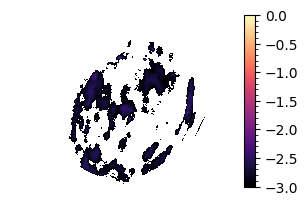

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


width  = 3.487
height = width / 1.618 #* 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

yekin = ax.imshow(
                  # imarray0_OD_bg,#/np.max(imarray2),
                  # imarray1_OD_bg,
    np.log10(imarray0_OD_bg/np.max(imarray2_OD_bg)), 
           cmap='magma',
                  # cmap=newcmap,
           origin='lower',
           # extent=[-6, 6, -6, 6],
           vmin=-3,
           vmax=0,
           aspect='equal',
          )
cbar = fig.colorbar(yekin, cax=cax)
cbar.minorticks_on()
cbar.cmap.set_under('white')
# cbar.set_ticks([0.94, 0.96, 0.98, 1.00])
# cbar.set_ticks([0.94, 0.95, 0.96])
# ax.set_xlim(-6,6)
ax.set_xticks([ ])

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')
# plt.axis('off')
# ax.set_ylim(-6,6)
ax.set_yticks([ ])
# ax.set_xlabel(r'x ($\mu$m)')
# ax.set_ylabel(r'y ($\mu$m)')
# ax.set_title('Shot 257 (50 nm)', fontsize=16)
# ax.set_title('Shot 256 (10 nm)', fontsize=16)
# ax.set_title('Shot 82 (Calib.)', fontsize=16)
# ax.grid(linestyle='--',color='grey',alpha=0.5)
fig.set_size_inches(width, height)
fig.tight_layout()

In [31]:
# fig.savefig('/Users/yao/Desktop/Trans_82.pdf',dpi=600)
# fig.savefig('/Users/yao/Desktop/Trans_256.pdf',dpi=600)
fig.savefig('/Users/yao/Desktop/Trans_257.pdf',dpi=600)

## encircled energy graph inside the laser focal spot

In [19]:
data = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/Apollon/F2-DPM-2022/Ronan_analysis/Encircled_Energy_r28_4um.dat')

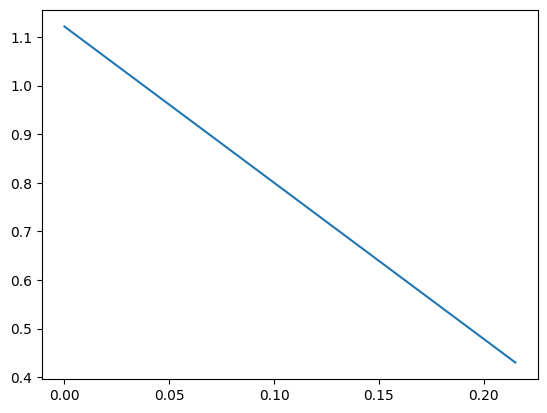

In [20]:
plt.plot(data[:][0],data[:][1])

In [21]:
distance = np.zeros(data.shape[0])
proportion = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    distance[i] = data[i][0]
    proportion[i] = data[i][1]

In [32]:
plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=10)

In [24]:
from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=10)

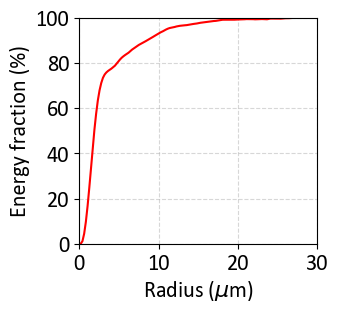

In [26]:
width  = 3.487 * 1.0
height = width / 1.618 * 1.5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(distance, proportion, color='r',lw=1.5,
             linestyle='-',
             label=r'$n_e$ (100$n_c$)',
           )

ax.set_xlim([0,30])
ax.set_ylim([0,100])
# ax.set_xticks([6,11,16])
# plt.title('time = {:.1f} fs'.format(ttf[idt]))
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel(r'Radius ($\mu$m)')
ax.set_ylabel('Energy fraction (%)')
# ax.legend(fancybox=False, frameon=False, loc='best',fontsize=10)
fig.set_size_inches(width, height)
fig.tight_layout()

In [27]:
fig.savefig('/Users/yao/Desktop/proportion.pdf',dpi=600)

In [22]:
np.zeros(data.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# plot E/E_max with Ronan's data

# read the data

# 1st column - E/E_max
# 2nd column - angle
# 3rd column - error bar

data_folder = '/Users/yao/Nextcloud/PROJECTS/Apollon/F2-DPM-2022/Ronan_analysis/Data/'

l800 = np.loadtxt(data_folder + 'Beam_Divergence_Al-800nm.txt')
l150 = np.loadtxt(data_folder + 'Beam_Divergence_Si-100nm_Al-50nm.txt')
l20  = np.loadtxt(data_folder + 'Beam_Divergence_Si-20nm.txt')
mod  = np.loadtxt(data_folder + 'divergence.txt')

In [10]:
l800[:,2]

array([ 0.027,  2.339,  1.977,  1.317,  4.239,  7.147,  7.279,  8.924,
       15.309])

In [11]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
plt.rc('legend', fontsize=8)

In [17]:
width  = 3.487 * 1.0
height = width #/ 1.618 * 1.0

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.errorbar(l800[:,0], l800[:,1]/2., 
            yerr=l800[:,2], 
            fmt='sb',markersize=4,
            mfc='b',
            ecolor='b',elinewidth=1.0,
            capsize=2.0, capthick = 1.0,
            label='Direct shots (800 nm)'
           )

ax.errorbar(l150[:,0], l150[:,1]/2., 
            yerr=l150[:,2], 
            fmt='or',markersize=4,
            mfc='none',
            ecolor='r',elinewidth=1.0,
            capsize=2.0, capthick = 1.0,
            label='DPM shots (150 nm)'
           )

ax.errorbar(l20[:,0], l20[:,1]/2., 
            yerr=l20[:,2], 
            fmt='or',markersize=4,
            mfc='r',
            ecolor='r',elinewidth=1.0,
            capsize=2.0, capthick = 1.0,
            label='DPM shots (20 nm)'
           )

ax.plot(mod[:,0], mod[:,1],'--k',lw=2.0)
# ax.set_yscale('log')

ax.set_xlim([0,1.2])
ax.set_ylim([0,30])
# ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel(r'Normalized energy (E/E$_{\rm max}$)')
ax.set_ylabel(r'Beam divergence ($\degree$)')
ax.legend(fancybox=False, frameon=False)
# ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

In [18]:
fig.savefig('/Users/yao/Desktop/beam_divergence2.pdf',dpi=600)

## x-px 

In [137]:
xpx2 = np.array(S2.ParticleBinning(0, units=['um','fs','MeV'],data_log=True).getData())
xx2  = np.array(S2.ParticleBinning(0, units=['um','fs','MeV']).getAxis('x'))
px2  = np.array(S2.ParticleBinning(0, units=['um','fs','MeV']).getAxis('px'))
tt2  = np.array(S2.ParticleBinning(0, units=['um','fs','MeV']).getTimes())
ts2  = np.array(S2.ParticleBinning(0, units=['um','fs','MeV']).getTimesteps())

xpx0 = np.array(S0.ParticleBinning(0, units=['um','fs','MeV'],data_log=True).getData())
xx0  = np.array(S0.ParticleBinning(0, units=['um','fs','MeV']).getAxis('x'))
px0  = np.array(S0.ParticleBinning(0, units=['um','fs','MeV']).getAxis('px'))
tt0  = np.array(S0.ParticleBinning(0, units=['um','fs','MeV']).getTimes())
ts0  = np.array(S0.ParticleBinning(0, units=['um','fs','MeV']).getTimesteps())

In [153]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

idt = 5

width  = 3.487 * 1.5
height = width / 1.618 * 1.0

fig = plt.figure(figsize=(width, height))
# fig = plt.figure()

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.1,
                 )

im0 = grid[0].imshow((xpx0[30].T),
           # cmap='inferno_r',
           cmap=newcmap,
           origin='lower',
           extent=[xx0[0],xx0[-1],px0[0],px0[-1]],
           vmin=-4,
           vmax=0,
           aspect=0.025,
          )

im1 = grid[1].imshow((xpx2[idt*8].T),
           # cmap='inferno_r',
                                          cmap=newcmap,
           origin='lower',
           extent=[xx2[0],xx2[-1],px2[0],px2[-1]],
           vmin=-4,
           vmax=0,
          aspect=0.025,
          )

grid[0].set_xlim(10,20)
grid[1].set_xlim(10,20)
grid[1].set_ylim(0,400)
grid[0].set_ylim(0,400)
grid[0].set_xlabel(r'x ($\mu$m)')
grid[1].set_xlabel(r'x ($\mu$m)')
grid[0].set_ylabel(r'$p_x$ ($m_ec$)')
# grid[0].set_xticks([0, 7, 14,  21])
# grid[1].set_xticks([1, 6, 11, 16, 21])
# grid[0].set_yticks([0, 7, 14, 21, 28, 35, 42])
# grid[0].set_yticks([7, 14, 21, 28, 35])
# grid[0].set_title('time = {:.1f} fs'.format(tt2[3]))
# grid[1].set_title('time = {:.1f} fs'.format(tt2[4]))
grid[0].grid(linestyle='--',color='grey',alpha=0.5)
grid[1].grid(linestyle='--',color='grey',alpha=0.5)

# Colorbar
grid[1].cax.colorbar(im1)
grid[1].cax.cla()
mpl.colorbar.Colorbar(grid[1].cax,im1)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
# axis.label.set_text(r'$\log_{10} \varepsilon_{kin}$ (keV)')
# grid[1].cax.toggle_label(r'$n_p (cm^{-3})$')
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
fig.tight_layout()
fig.set_size_inches(width, height)
plt.show()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_24424/2967060559.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [154]:
fig.savefig('/Users/yao/Desktop/xpx_55fs.pdf',dpi=600)

In [121]:
np.log10(xpx2[3].T).max()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_24424/679647690.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(xpx2[3].T).max()


0.5460726504736202

In [128]:
S2.ParticleBinning(0, units=['um','fs','MeV','V/m','T'],data_log=True,
                  cmap='jet',
                  vmin=-4,
                  vmax=1).slide()


#0 - Number density of species # 3
    x from 0 to 125.664 in 200 steps 
    px from -200 to 600 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [132]:
xx2[-1]

21.09254729094142

In [142]:
ttf[9]

1168.9522395833335

In [140]:
tti

array([ 991.875     , 1011.16145833, 1030.44791667, 1049.734375  ,
       1069.02083333, 1088.30729167, 1107.59375   , 1126.88020833,
       1146.16666667, 1165.453125  , 1184.73958333])

In [141]:
tte

array([ 991.875     , 1011.16145833, 1030.44791667, 1049.734375  ,
       1069.02083333, 1088.30729167, 1107.59375   , 1126.88020833,
       1146.16666667, 1165.453125  , 1184.73958333])

In [144]:
tt0[30]

1167.9328125